 Project 2: Spotify Data Exploration and Visualizations
 Analyze the Spotify dataset to explore trends in music popularity, genre
 evolution, key song features influencing popularity, seasonal trends, and
 clustering of songs based on acoustic characteristics; perform thorough
 data exploration, including handling missing values and outliers, and
 present insights using at least five well-designed visualizations for different
 types of plots.

###Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

##load the dataset

In [2]:
Songs=pd.read_csv('songs_normalize.csv')

In [3]:
Songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77,0.751,0.834,1,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999.0,79,0.434,0.897,0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999.0,66,0.529,0.496,7,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78,0.551,0.913,0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000.0,65,0.614,0.928,8,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
##checking statistical summary
Songs.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1997.000000,1992.000000,2000.000000,1997.000000,1997.000000,2000.000000,1998.000000,1992.000000,1999.000000,2000.000000,2000.000000,1996.000000,1998.000000,1994.000000
mean,228790.657987,2009.531124,59.872500,0.667597,0.720353,5.378000,-5.512633,0.555221,0.103595,0.128955,0.015226,0.181196,0.551894,120.118363
std,39144.966769,5.842056,21.335577,0.140423,0.152720,3.615059,1.933322,0.497066,0.096175,0.173346,0.087771,0.140668,0.220803,26.973850
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203600.000000,2005.000000,56.000000,0.581000,0.622000,2.000000,-6.489500,0.000000,0.039600,0.014000,0.000000,0.088175,0.387000,98.719500
50%,223386.000000,2010.000000,65.500000,0.677000,0.736000,6.000000,-5.285000,1.000000,0.059900,0.055700,0.000000,0.124000,0.558000,120.021500
75%,248133.000000,2015.000000,73.000000,0.764000,0.839000,8.000000,-4.168000,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.398500
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [5]:
##checking basic info
Songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              1997 non-null   object 
 2   duration_ms       1997 non-null   float64
 3   explicit          1985 non-null   object 
 4   year              1992 non-null   float64
 5   popularity        2000 non-null   int64  
 6   danceability      1997 non-null   float64
 7   energy            1997 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          1998 non-null   float64
 10  mode              1992 non-null   float64
 11  speechiness       1999 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          1996 non-null   float64
 15  valence           1998 non-null   float64
 16  tempo             1994 non-null   float64


##Data preprocessing

In [6]:
##checking missing values
Songs.isnull().sum()

,0
artist,0
song,3
duration_ms,3
explicit,15
year,8
popularity,0
danceability,3
energy,3
key,0
loudness,2


##Handling missing values

In [7]:
##filling the missing values with "ffill" and "bfill" method
Songs.fillna(method='ffill', inplace=True)
Songs.fillna(method='bfill', inplace=True)


<ipython-input-7-47479fb7818d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Songs.fillna(method='ffill', inplace=True)
<ipython-input-7-47479fb7818d>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Songs.fillna(method='ffill', inplace=True)
<ipython-input-7-47479fb7818d>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Songs.fillna(method='bfill', inplace=True)


In [8]:
#printing missing values
Songs.isnull().sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


##Outlier Detection

In [9]:
# Select  numeric columns for quantile calculation
numeric_cols = Songs.select_dtypes(include=np.number)

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1



In [10]:
# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
##creating outliers in a numeric column
outlier_mask_numeric = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

In [12]:
# Filter out rows where at least one numeric column is identified as an outlier
row_outlier_mask = outlier_mask_numeric.any(axis=1)

data_filtered = Songs[~row_outlier_mask]

###Data Visualization

Trends in Music Popularity

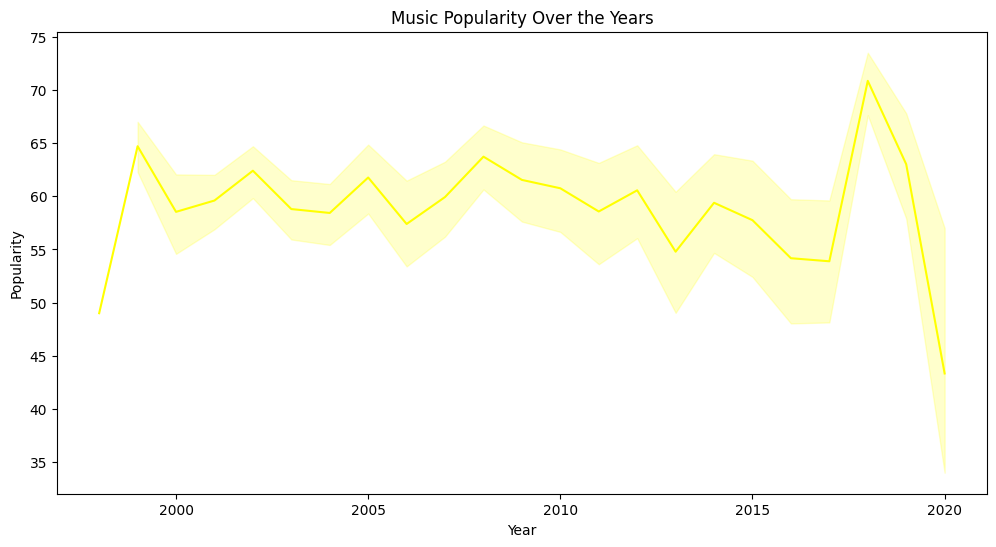

In [13]:
# Popularity trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=Songs, x='year', y='popularity',color='yellow')
plt.title('Music Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

##Genre Evolution

Analyzing how different genres have gained or lost popularity over time.

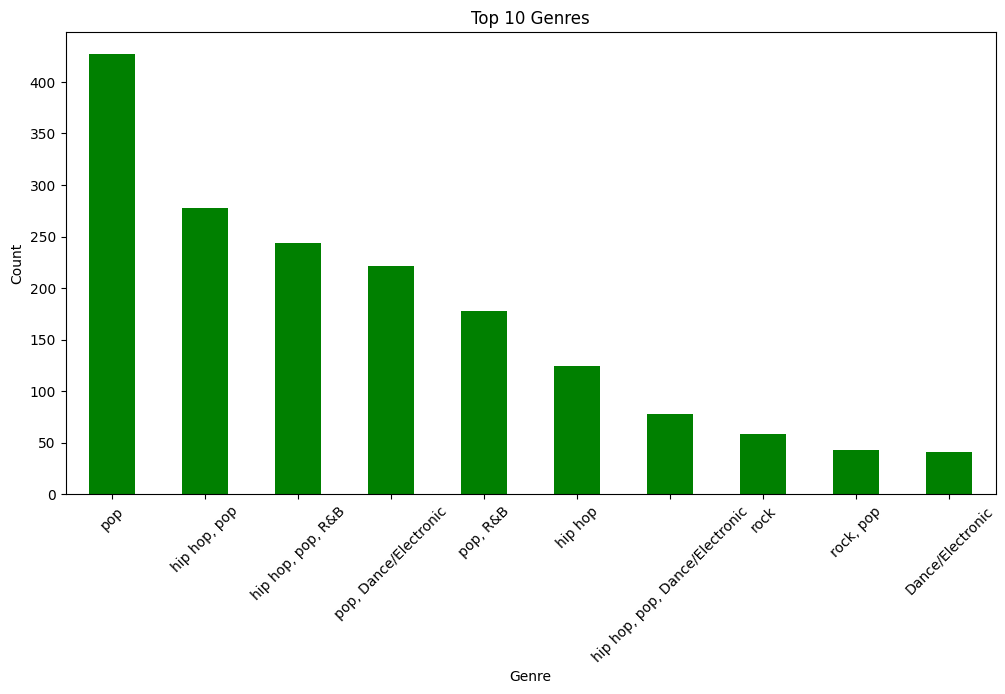

In [14]:
plt.figure(figsize=(12,6))
Songs['genre'].value_counts().nlargest(10).plot(kind='bar',color='green')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##Distribution of Songs by Year


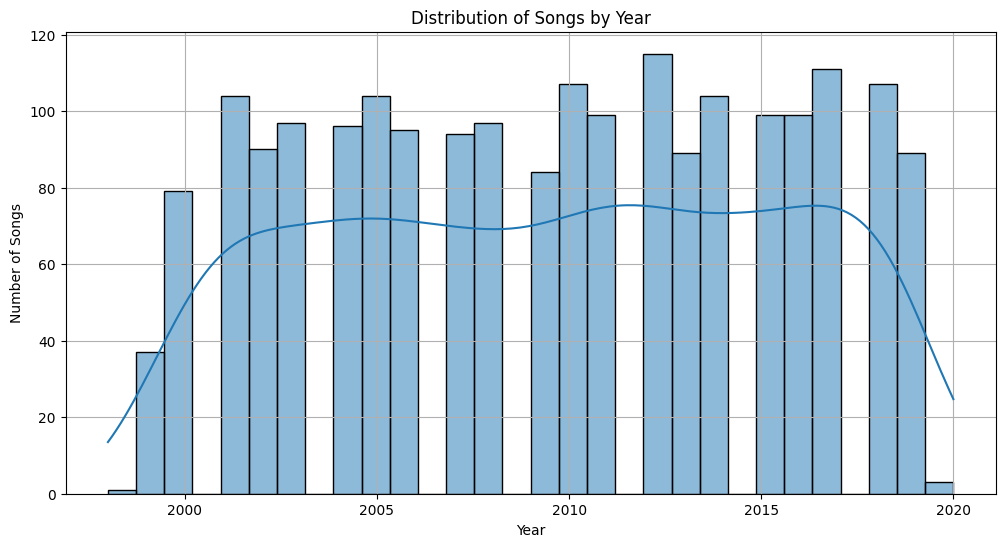

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(Songs['year'], bins=30, kde=True)
plt.title('Distribution of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()


Correlation Heatmap

In [16]:
# Calculate the correlation matrix, only considering numeric columns
corr_matrix = Songs.corr(numeric_only=True)

In [17]:
corr_matrix

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123871,-0.316372,0.050510,-0.059471,-0.077745,-0.002988,-0.079453,-0.003888,0.066552,0.011100,-0.004118,0.024096,-0.115942,-0.028855
explicit,0.123871,1.000000,0.078414,0.046605,0.247463,-0.161223,0.003320,-0.090808,0.050190,0.417382,-0.033523,-0.082522,0.009873,-0.042613,0.014979
year,-0.316372,0.078414,1.000000,-0.003685,0.033052,-0.109228,0.007286,0.016863,-0.005955,0.001257,0.033951,-0.050280,-0.024819,-0.209678,0.079145
popularity,0.050510,0.046605,-0.003685,1.000000,-0.003086,-0.014264,0.014823,0.030656,-0.022206,0.021491,0.024619,-0.048059,-0.006696,-0.016596,0.012213
danceability,-0.059471,0.247463,0.033052,-0.003086,1.000000,-0.105106,0.031118,-0.033369,-0.064086,0.146193,-0.065836,0.023354,-0.126196,0.399084,-0.169692
energy,-0.077745,-0.161223,-0.109228,-0.014264,-0.105106,1.000000,-0.002727,0.648391,-0.041413,-0.057139,-0.446313,0.038869,0.157813,0.333917,0.152801
key,-0.002988,0.003320,0.007286,0.014823,0.031118,-0.002727,1.000000,-0.008104,-0.154452,0.007256,0.002365,-0.008173,-0.032128,0.034855,-0.002194
loudness,-0.079453,-0.090808,0.016863,0.030656,-0.033369,0.648391,-0.008104,1.000000,-0.029522,-0.073590,-0.308711,-0.105055,0.102096,0.235559,0.082355
mode,-0.003888,0.050190,-0.005955,-0.022206,-0.064086,-0.041413,-0.154452,-0.029522,1.000000,0.000556,0.006484,-0.038434,0.024677,-0.073078,0.046742
speechiness,0.066552,0.417382,0.001257,0.021491,0.146193,-0.057139,0.007256,-0.073590,0.000556,1.000000,0.000476,-0.062931,0.061733,0.074505,0.059143


##Popularity by Genre

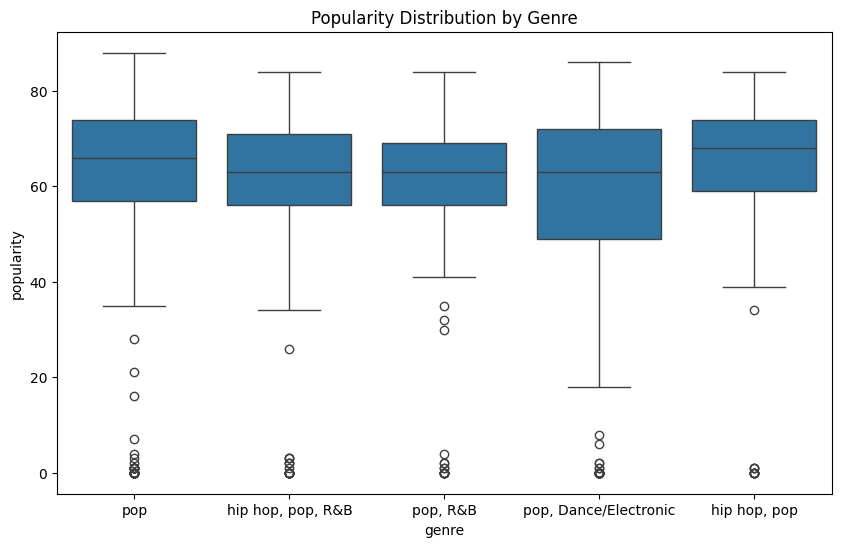

In [18]:
top_genres = Songs['genre'].value_counts().nlargest(5).index
filtered =Songs[Songs['genre'].isin(top_genres)]

plt.figure(figsize=(10,6))
sns.boxplot(data=filtered, x='genre', y='popularity')
plt.title('Popularity Distribution by Genre')
plt.show()


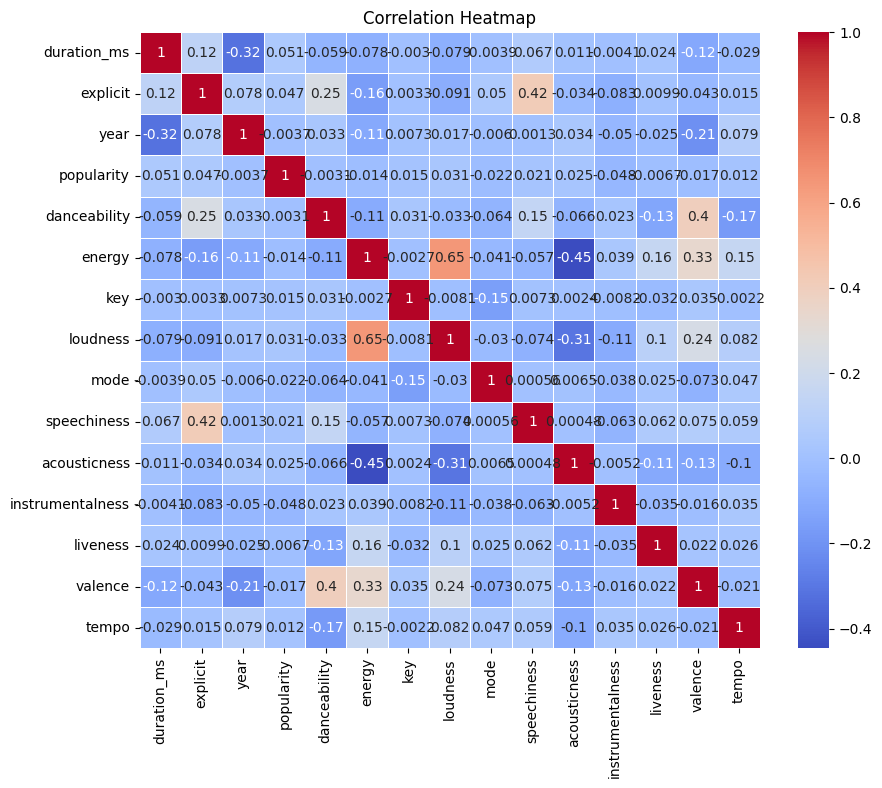

In [19]:
## heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



## Clustering Songs Based on Acoustic Features

In [20]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = StandardScaler().fit_transform(Songs[features])

In [21]:
# Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# KMeans Clustering

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Visualization

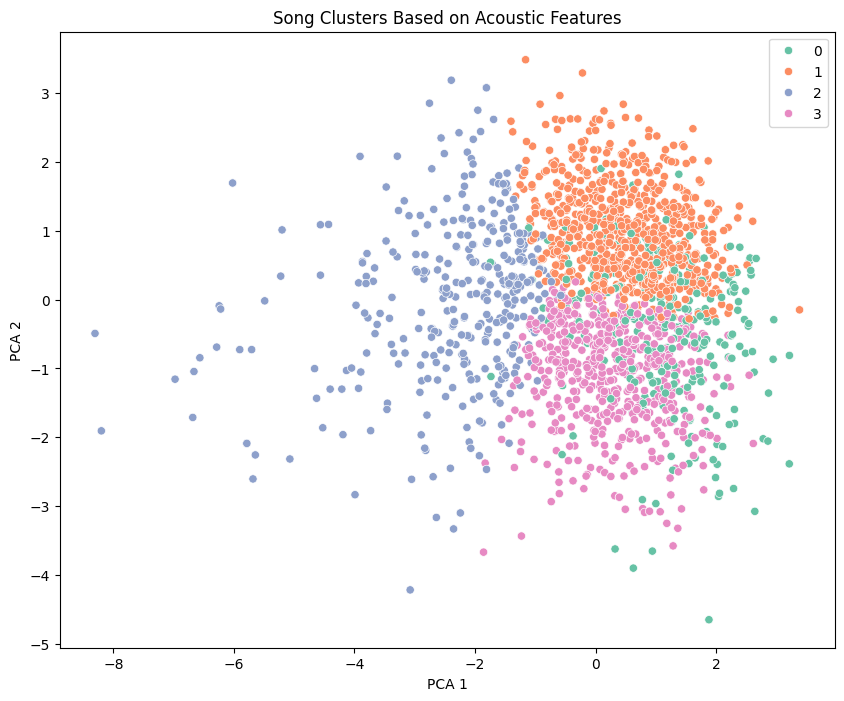

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2')
plt.title('Song Clusters Based on Acoustic Features')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

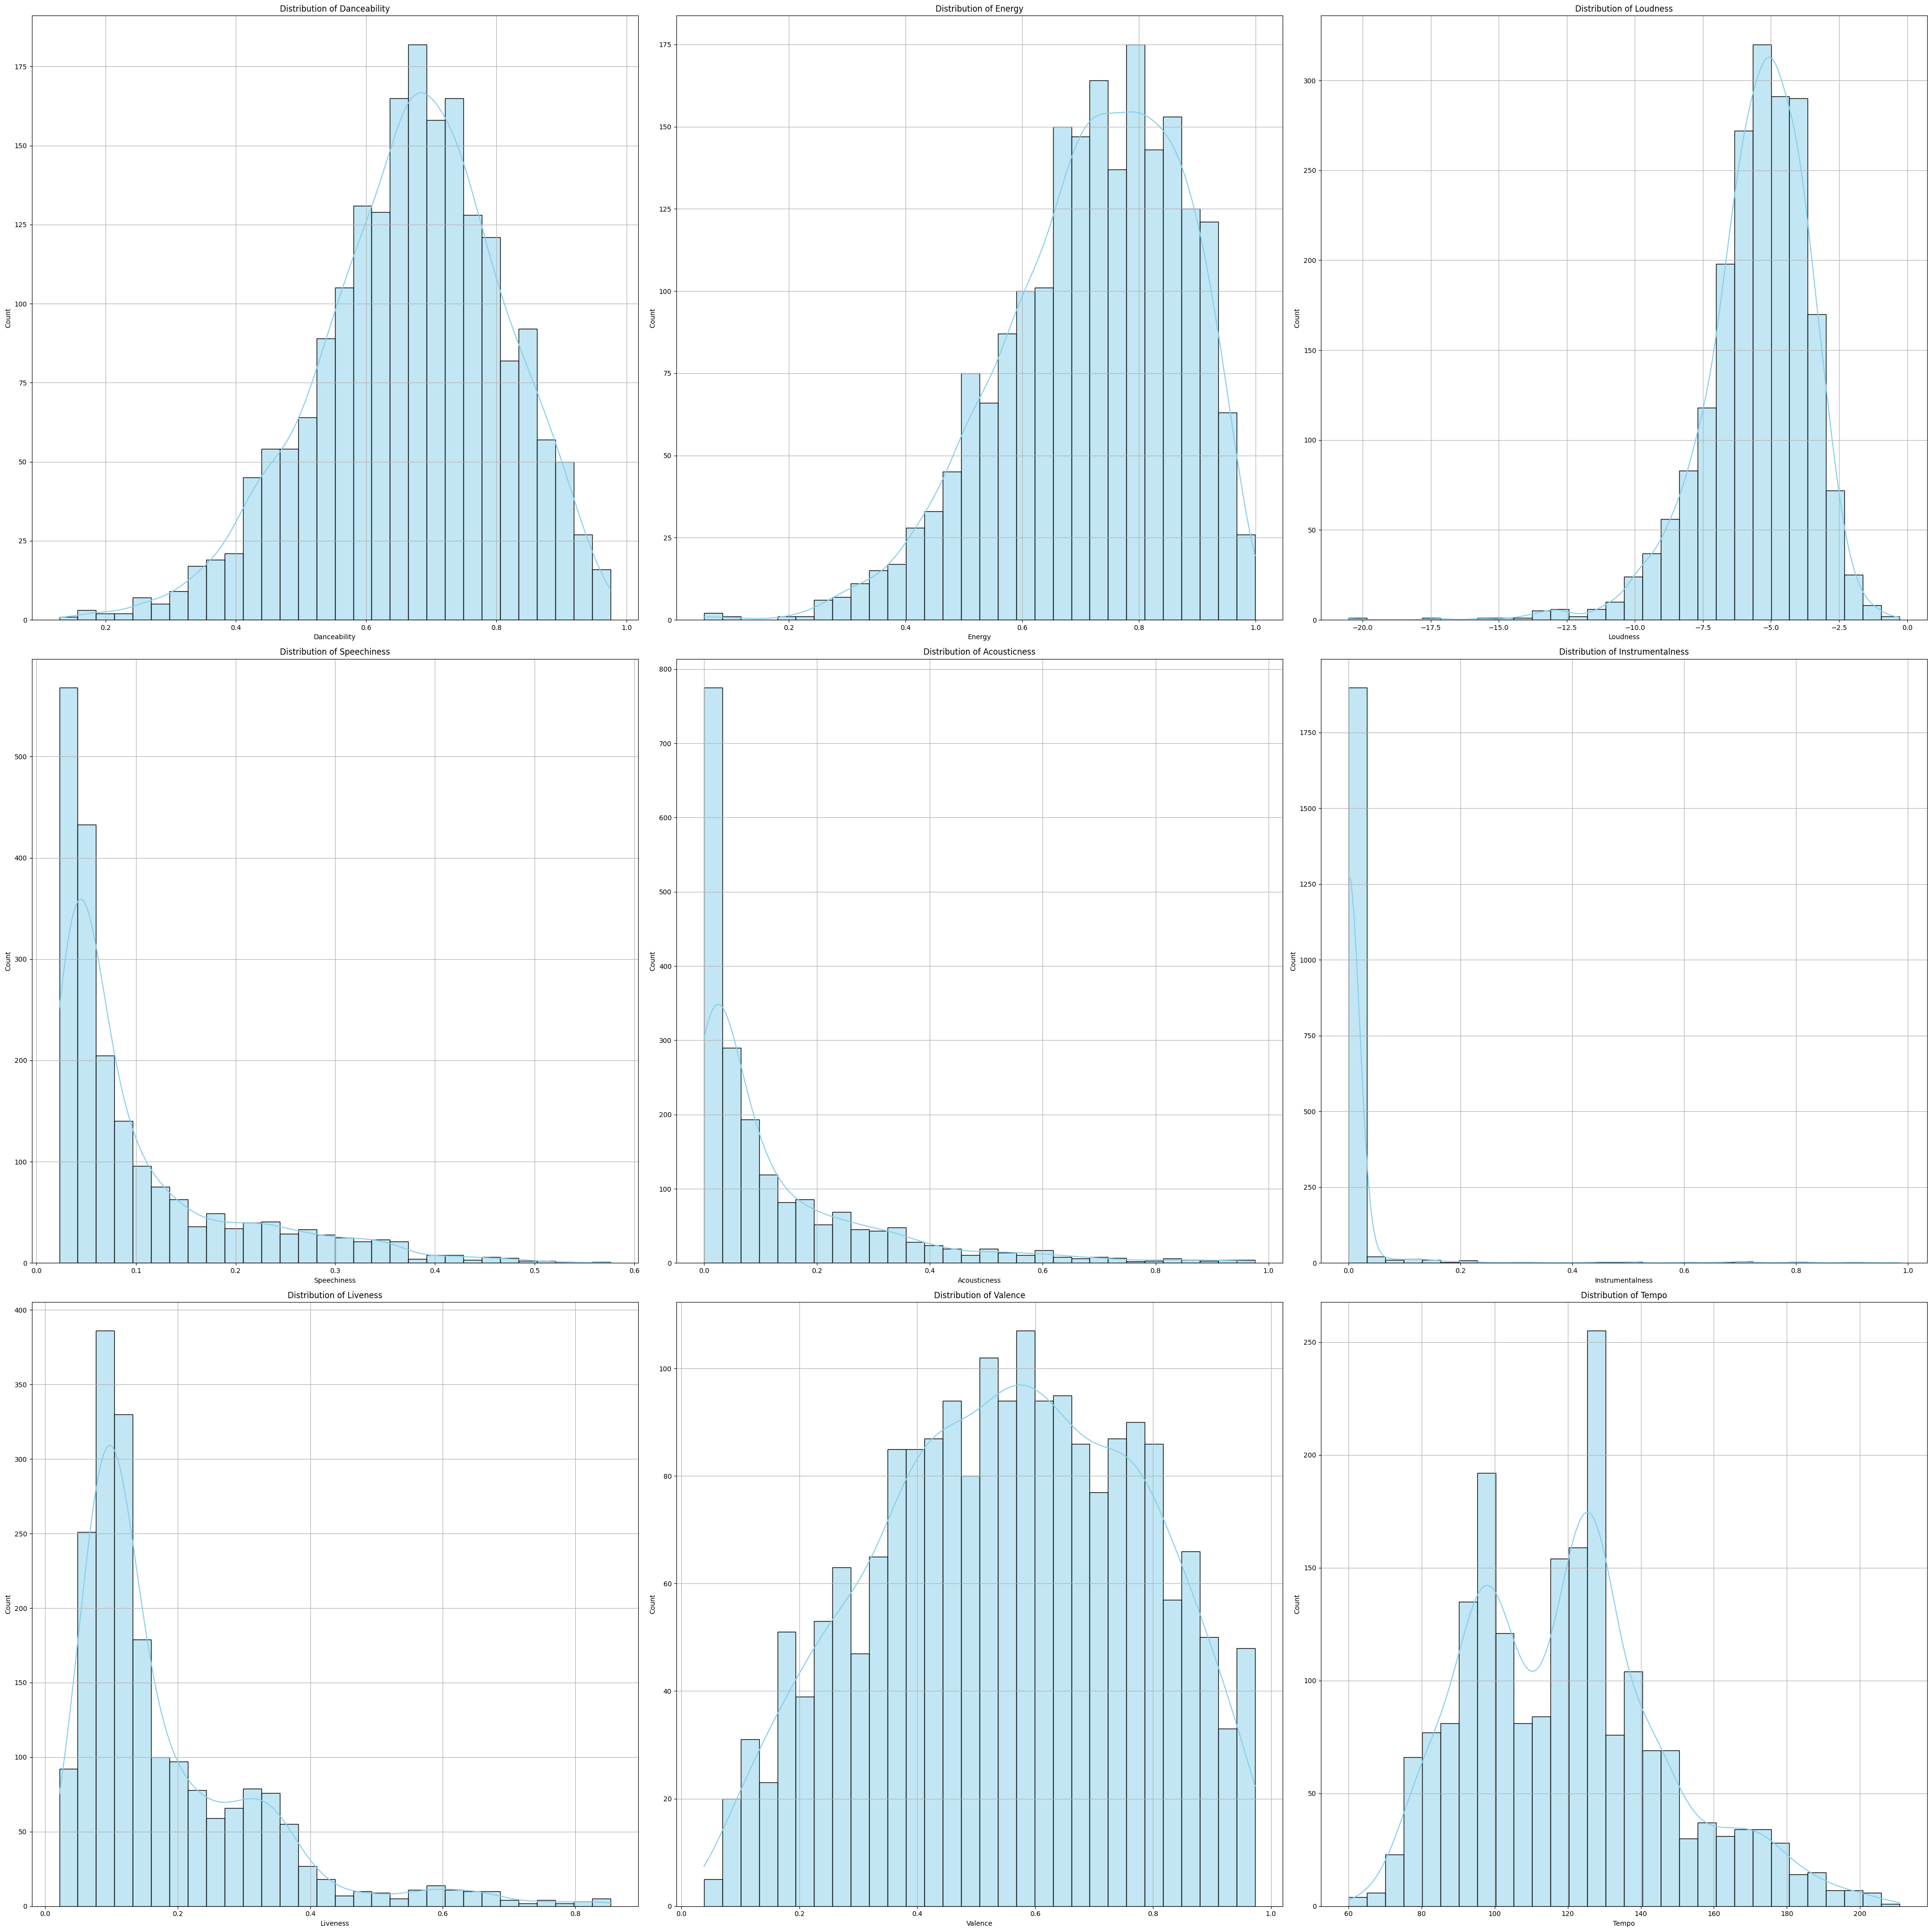

In [24]:
# Set up the plot grid
plt.figure(figsize=(40, 40))
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']

for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(Songs[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.grid(True)

plt.tight_layout()
plt.show()

###Insights

Popularity Trends: Popularity has shown significant fluctuations over the years, influenced by the rise of digital streaming.
Genre Evolution: Certain genres have peaked in popularity, while others have declined, reflecting changes in listener preferences.
Key Features: Strong correlations with popularity were observed in features like energy and loudness, indicating their importance in hit songs.
Seasonal Trends: Specific months showed higher popularity, suggesting seasonal influences on music releases.
Clustering: Songs can be effectively grouped based on their acoustic features, revealing distinct styles and characteristics.